In [3]:
import numpy as np
import matplotlib.pylab as plt 
from scipy.stats import mode
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
basis_df = pd.read_csv("marketing_campaign_fixed.csv",index_col='ID')
basis_df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,7,0,0,0,0,0,1,0,3,11
2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,5,0,0,0,0,0,0,0,3,11
4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,...,4,0,0,0,0,0,0,0,3,11


Conerting Data

In [5]:
basis_df.Education = basis_df.Education.astype('category')
basis_df.Marital_Status= basis_df.Marital_Status.astype('category')
basis_df.Dt_Customer = pd.to_datetime(basis_df.Dt_Customer)

In [6]:
basis_df['Age'] = 2021-basis_df.Year_Birth
basis_df.drop(columns=['Year_Birth','Z_CostContact','Z_Revenue','Complain'],inplace=True)

In [7]:
basis_df['Total_Payment']= basis_df.MntFishProducts+basis_df.MntFruits+basis_df.MntGoldProds+basis_df.MntMeatProducts+basis_df.MntSweetProducts+basis_df.MntWines
basis_df.drop(columns=['MntWines','MntFruits','MntSweetProducts','MntFishProducts','MntMeatProducts','MntGoldProds'],inplace=True)


In [8]:
basis_df.dropna(inplace=True)

In [9]:
basis_df['Kids'] = basis_df.Kidhome + basis_df.Teenhome
basis_df.drop(columns=['Kidhome','Teenhome'],inplace=True)

In [10]:
basis_df['Accepted_Cmp'] = basis_df.AcceptedCmp1 + basis_df.AcceptedCmp2 + basis_df.AcceptedCmp3 + basis_df.AcceptedCmp4 +basis_df.AcceptedCmp5 + basis_df.Response


In [11]:
basis_df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],inplace=True)

In [12]:
len(basis_df.query('Income > 150000')) 
basis_df.drop(basis_df[basis_df.Income>150000].index,inplace=True)

In [13]:
len(basis_df.query('Age > 120'))
basis_df.drop(basis_df[basis_df.Age>120].index,inplace=True)

In [14]:
from datetime import datetime
last_date = datetime.date(datetime.now())
basis_df['Seniority']=pd.to_datetime(basis_df['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
basis_df['Seniority'] = pd.to_numeric(basis_df['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
basis_df.drop(columns='Dt_Customer',inplace=True)

<AxesSubplot:xlabel='Accepted_Cmp', ylabel='Total_Payment'>

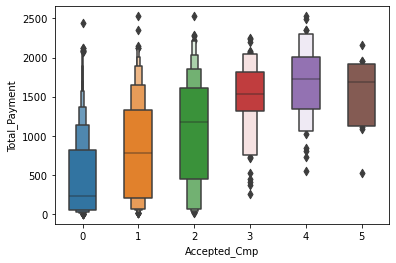

In [13]:
sns.boxenplot(data= basis_df, x='Accepted_Cmp',y='Total_Payment',width=0.5)

<AxesSubplot:ylabel='Count'>

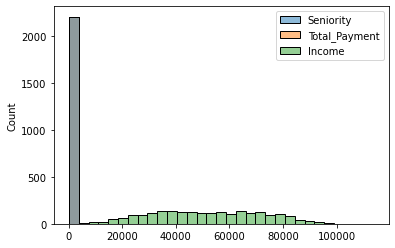

In [65]:
sns.histplot(data=basis_df[['Seniority','Total_Payment','Income','Marital_Status','Education']])

<AxesSubplot:xlabel='Accepted_Cmp', ylabel='Income'>

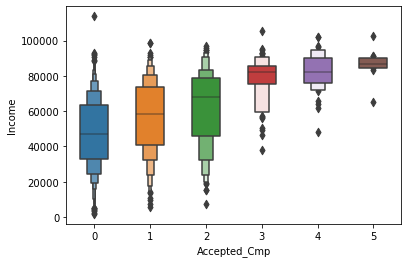

In [21]:
sns.boxenplot(data= basis_df, x='Accepted_Cmp',y='Income',width=0.5)

In [56]:
basis_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Total_Payment', 'Kids', 'Accepted_Cmp',
       'Seniority'],
      dtype='object')

In [15]:
num_cols = ['Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Total_Payment', 'Kids', 'Accepted_Cmp',
       'Seniority']

<AxesSubplot:>

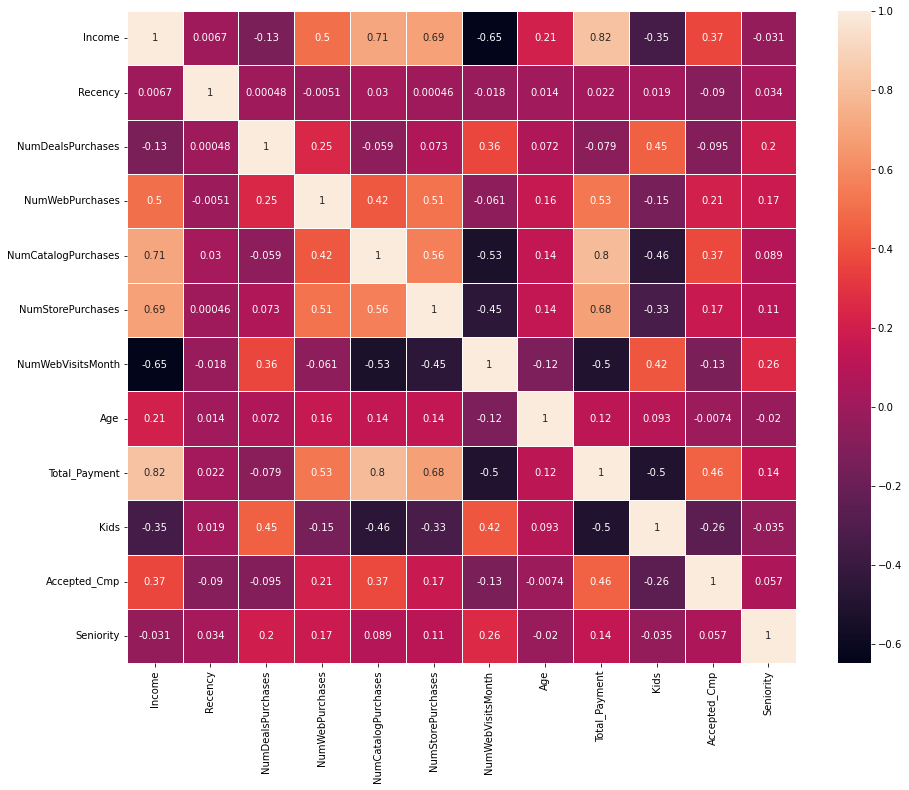

In [15]:
_, ax2 = plt.subplots(figsize=(15, 12))
sns.heatmap(basis_df[num_cols].corr(), annot=True, linewidths=.5, ax=ax2)

In [16]:
basis_df['Total_Purchas'] = basis_df.NumCatalogPurchases+basis_df.NumDealsPurchases+basis_df.NumStorePurchases+basis_df.NumWebPurchases+basis_df.NumWebVisitsMonth


(array([ 37., 185., 333., 398., 351., 366., 331., 173.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

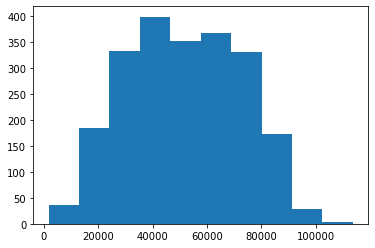

In [17]:
#sns.pairplot(df_for_clusstering2,hue='Accepted_Cmp')
plt.hist(basis_df['Income'])

<AxesSubplot:>

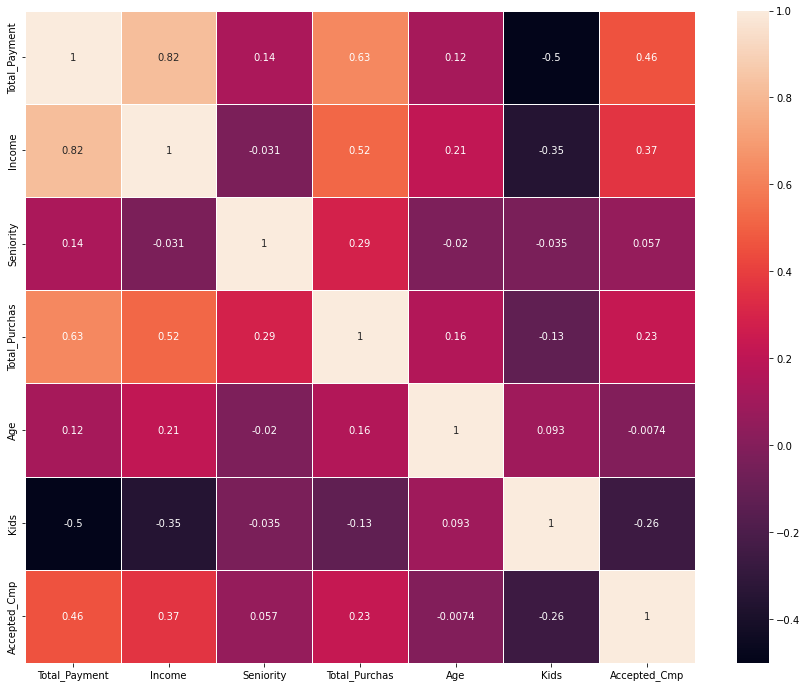

In [18]:
#plt.hist(basis_df.Total_Purchas)
#sns.pairplot(data=basis_df[['Total_Payment','Income','Seniority','Total_Purchas','Accepted_Cmp']],hue='Accepted_Cmp')
_, ax2 = plt.subplots(figsize=(15, 12))
sns.heatmap(basis_df[['Total_Payment','Income','Seniority','Total_Purchas','Age','Kids','Accepted_Cmp']].corr(), annot=True, linewidths=.5, ax=ax2)

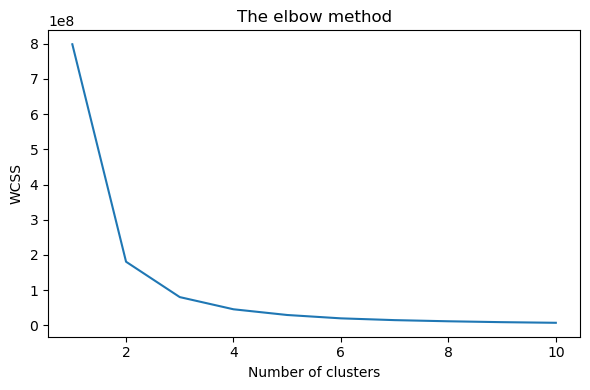

In [90]:
clust = basis_df[['Total_Payment','Seniority','Total_Purchas']]
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(clust)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(dpi=100)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.tight_layout()


In [78]:
from sklearn.preprocessing import normalize
data_scaled = normalize(clust)
data_scaled = pd.DataFrame(data_scaled, columns=clust.columns)
X = data_scaled.values
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_



array([[0.44928544, 0.86749783],
       [0.97333964, 0.17898913]])

In [89]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='man', linkage='ward')  
cluster.fit_predict(data_scaled)

ValueError: ward was provided as affinity. Ward can only work with euclidean distances.

In [91]:
X= clust.values
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[ 153.2786229 ,  102.55481719,   15.96957566],
       [1669.84507042,  104.85408451,   25.01408451],
       [ 921.46755408,  103.93832501,   26.23960067]])

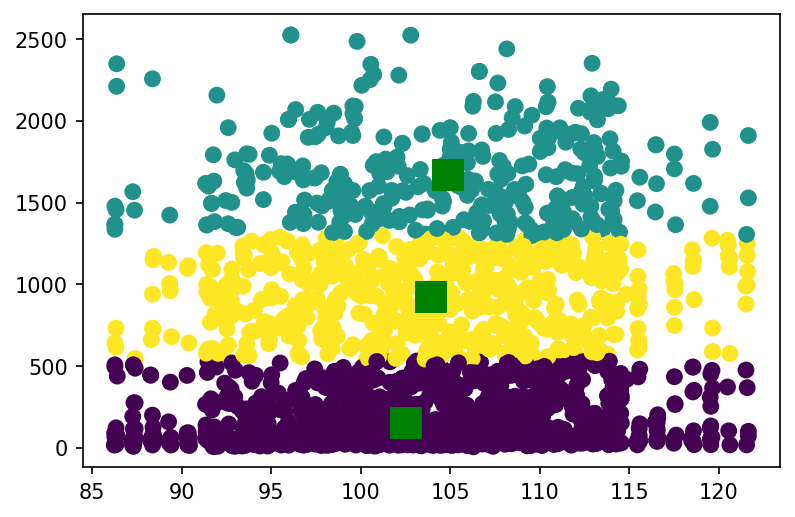

In [96]:
plt.figure(dpi=150)
plt.scatter(X[ : , 1], X[ : , 0], s =50, c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=200, c='g', marker='s')

In [25]:
df_for_clusstering2= basis_df[['Income','Total_Payment','Seniority']]
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')#  
y_hc = hc.fit_predict(df_for_clusstering2)
X = df_for_clusstering2.values
df_for_dc_tree = basis_df[['Education','Marital_Status','Kids']]
df_for_dc_tree['Customer_Kind'] = y_hc
df_for_dc_tree.Customer_Kind.replace({0:'Medium',1:'Low',2:'Target'},inplace=True)
df_for_dc_tree.Kids.replace({0:'No Kids',1:'Has Kids',2:'Has Kids',3:'Has Kids'},inplace=True)
x = np.array(basis_df.Accepted_Cmp)
df_for_dc_tree['Accepted_Cmp'] = x
df_for_dc_tree.Marital_Status.replace({'Single':'Single','Together':'Not Single','Married':'Not Single','Widow':'Single',
                                     'Divorced':'Single','Alone':'Single','Absurd':'Not Single','YOLO':'Single'},inplace=True)
df_for_dc_tree.Education.replace({'PhD':'Academy','Master':'Academy','2n Cycle':'Academy',
                                  'Basic':'Not Academy','Graduation':'Not Academy'},inplace = True)

C:\Users\nivz9\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\nivz9\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\nivz9\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [20]:
clust = basis_df[['Total_Payment','Income','Seniority','Total_Purchas','Accepted_Cmp']]
#sns.pairplot(clust,hue='Accepted_Cmp')
try_df = df_for_dc_tree
try_df['Total_Purchas'] = clust['Total_Purchas']
try_df.Customer_Kind.replace({0:'Medium',1:'Low',2:'Target'},inplace=True)
try_df.Kids.replace({0:'No Kids',1:'Has Kids',2:'Has Kids',3:'Has Kids'},inplace=True)

C:\Users\nivz9\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Customer_Kind', ylabel='Total_Purchas'>

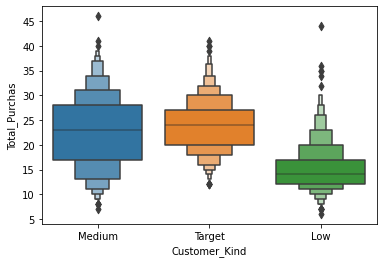

In [21]:
sns.boxenplot(x=try_df['Customer_Kind'],y=try_df['Total_Purchas'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Purchas'>

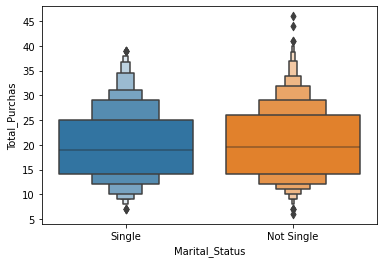

In [22]:
sns.boxenplot(x=try_df['Marital_Status'],y=try_df['Total_Purchas'])

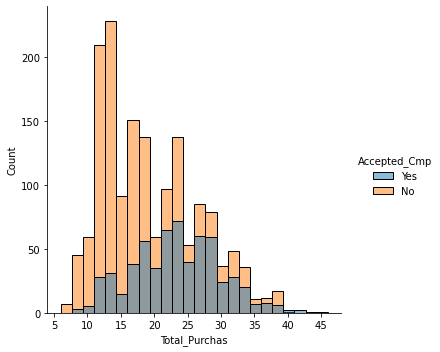

In [29]:
#df_for_dc_tree.Accepted_Cmp.replace({0:'No',1:'Yes',2:'Yes',3:'Yes',4:'Yes',5:'Yes'},inplace=True)
sns.displot(data = try_df,x='Total_Purchas',hue='Accepted_Cmp')

In [50]:
#try_df.loc[try_df.Total_Purchas<15,'Total_Purchas'] = 0
#try_df.loc[try_df.Total_Purchas>30,'Total_Purchas'] = 2
#try_df.loc[try_df.Total_Purchas>=15,'Total_Purchas'] = 1
try_df.Total_Purchas.replace({0:'Low',1:'Medium',2:'Target'},inplace=True)


C:\Users\nivz9\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [78]:
import sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
feature_cols = ['Marital_Status','Customer_Kind','Total_Purchas']

x = try_df[feature_cols]
y = try_df['Accepted_Cmp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.74


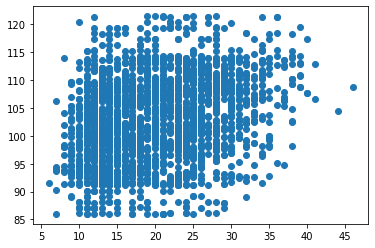

In [60]:
plt.scatter(clust.Total_Purchas,clust.Seniority)

In [58]:
import plotly.express as px
def num_plot(df, col):
    fig = px.histogram(df, x=col, marginal="box")
    fig.update_layout(height=300, width=500, showlegend=True)
    fig.update_traces(marker_line_width=1,marker_line_color="black")
    fig.show()
    
num_plot(basis_df,'Income'),num_plot(basis_df,'Total_Payment'),num_plot(basis_df,'Seniority'),num_plot(basis_df,'Total_Purchas')

(None, None, None, None)

###########################################################################################################################################################################################################################################

In [135]:
basis_df.Accepted_Cmp.replace({0:'No',1:'Yes',2:'Yes',3:'Yes',4:'Yes',5:'Yes'},inplace=True)
basis_df.Accepted_Cmp = basis_df.Accepted_Cmp.astype('category')

In [136]:
basis_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Total_Payment', 'Kids', 'Accepted_Cmp',
       'Seniority', 'Total_Purchas'],
      dtype='object')

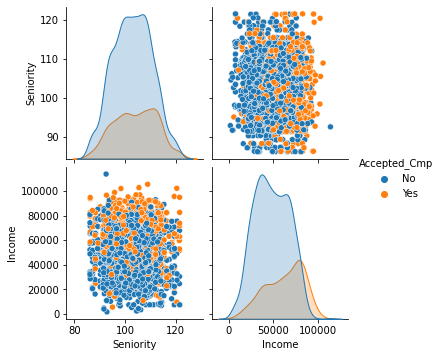

In [145]:
sns.pairplot(data=basis_df[[  'Seniority', 'Accepted_Cmp',
       'Income']],hue='Accepted_Cmp')